<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/analise_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conceitos**

Encontrar grupos de informação, produtos ou até mesmo pessoas com base em dados, pode ser chamada de análise de cluster ou análise de conglomerados.

Definição - Técnica de ML não supervisionada que permite agrupar dados em grupos homogêneos em função do grau de similiaridade entre os indivíduos por meio de características selecionadas.

Correlação - Coeficiente que mede a força e doreção do relacionamento linear entre duas variáveis.

Similaridade - Medida de proximidade, ou seja, deve ser comparar pares de objetos e aplicar medidas de distâncas, essas métricas verifica o quanto um indivíduo é diferente do outro.

Quando buscamos agrupar variáveis (colunas do banco de dados) utilizamos a correlação. Quando precisamos comparar indivíduos (as linhas do banco de dados) aplicamos métricas de similaridade, onde as medidas de distância serão importantes.

**Etapas para realizar uma análise de cluster**

1. Escolha das variáveis, identificação de outliers, padronização.

A seleção das variáveis é uma decisão combinada entre as áreas de negócios e Analytics. Identificação de outliers é uma etapa importante para encontrar nos dados valores acima ou abaixo do considerado normal.
A tarefa mais importante é a padronização das variáveis, em diversos momentos, as colunas possuem unidades de medidas diferentes e nesse caso, não podemos aplicar o algoritmo diretamente, precisamos ajustar esses dados.

2. MEDIDA DE DISTÂNCIA (SIMILARIDADE).

Aaplicar a medida de distância, a métrica mais utilizada em análise de cluster é a distância euclidiana. Essa métrica é uma generalização do teorema de Pitágoras.

3. ESCOLHA DO ALGORITMO DE AGRUPAMENTO (HIERÁRQUICOS E NÃO HIERÁRQUICOS).

Buscar uma forma de organizar cada indivíduo no seu respectivo grupo. Definição do método de agrupamento. Existe 2 gerais, hierárquicos e não hierárquicos e o método híbrido que é a combinação dos dois. Os algoritmos hierárquicos geram os grupos de forma iterativa, em cada etapa, é vista a distâncias entre os múltiplos indivíduos e as menores distâncias são agrupadas formando os clusters e no final, um coeficiente de aglomeração é obtido informando em cada iteração como os grupos foram ajustados.
E no caso dos não hierárquicos, é preciso definir a quantidade de grupos no inicio e após isso, a cada iteração as distâncias são obtidas e os grupos são formados.

4. ESCOLHA DA QUANTIDADE DE GRUPOS.

Nos métodos hierárquicos quanto nos algoritmos não hierárquicos existe técnicas para obter o número ideal de clusters. Não tem um padrão sobre quais as melhores ou mais eficientes, porém adota-se os hierárquicos para auxiliar no processo de obter esse número ideal.

5. INTERPRETAÇÃO DOS GRUPOS

Interpretar os grupos propostos pela análise. Uma vez que os algoritmos de aglomeração são não supervisionados, não tem uma medida direta para avaliar se a solução apresentada foi assertiva ou não. Uma alinhamento com a equipe de negócios e analistas deve ser organizada. Traduzir os resultados é a criação de personas que representam as características gerais dos grupos, esses resultado pode combinar os grupos formados pelas variáveis intervalares e combinar com variáveis qualitativas.

# **Prática**

In [4]:
# Import dos modulos gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Biblioteca para realizar as análises de cluster
import scipy.cluster.hierarchy as shc # Cluster hiérarquico
from sklearn.preprocessing import MinMaxScaler, scale # Função para a padronização dos dados
from sklearn.cluster import AgglomerativeClustering # Cluster hiérarquico
from sklearn.cluster import KMeans # Utilizado em grandes bancos de dados

# Carga dos dados
dados = pd.read_csv('rfm_analysis.csv')

dados.head()

,CustomerID,Recency,Frequency,Monetary_Value
0,12346.0,325,1,77183.60
1,12747.0,22,103,4196.01
2,12748.0,4,4595,33719.73
3,12749.0,22,199,4090.88
4,12820.0,44,59,942.34


In [5]:
# Padronização dos dados
# Seleção das colunas que vão ser utilizadas
cols = ['Recency', 'Frequency', 'Monetary_Value']
dados_cluster = dados[cols]

In [6]:
# min-max
minmax_scaler = MinMaxScaler()
dados_minmax = minmax_scaler.fit_transform(dados_cluster)
dados_minmax.shape

(3920, 3)

In [7]:
# Transformado o dados_minmax.shape em um frame para facilitar a leitura dos dados
# Etapa opcional
# dados_minmax transformados
dados_minmax = pd.DataFrame(dados_minmax, columns=dados_cluster.columns)
dados_minmax['CustomerID'] = dados['CustomerID']
dados_minmax.head()

,Recency,Frequency,Monetary_Value,CustomerID
0,0.466954,0.000000,0.297242,12346.0
1,0.031609,0.013000,0.016146,12747.0
2,0.005747,0.585521,0.129850,12748.0
3,0.031609,0.025236,0.015741,12749.0
4,0.063218,0.007392,0.003615,12820.0


In [8]:
# Scale
# Tem media 0 e o desv padrão 1
dados_normalizados = scale(dados_cluster)
dados_normalizados.shape

(3920, 3)

In [9]:
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_cluster.columns)
dados_normalizados['CustomerID'] = dados['CustomerID']
dados_normalizados.head()

,Recency,Frequency,Monetary_Value,CustomerID
0,1.915721,-0.410450,10.066906,12346.0
1,-0.718516,0.057911,0.311637,12747.0
2,-0.875005,20.684175,4.257675,12748.0
3,-0.718516,0.498722,0.297586,12749.0
4,-0.527251,-0.144127,-0.123237,12820.0


**Cluster Hibrido**

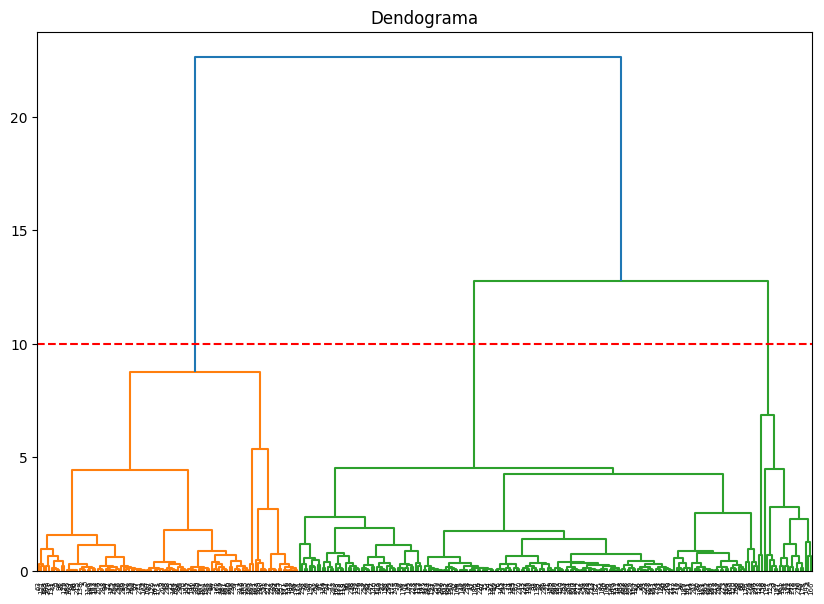

In [10]:
# Utilizado para obter o número ideal dos grupos
# O ideal é sempre utilizar uma amostra dos dados já que o metodo hierarquico é bastante custoso
# Utilizar o metodo de amostragem em para saber o número ideal de linhas.
dados_cluster_hierarquico = dados_normalizados[cols].sample(300, random_state = 5461)

# Algoritmo hierarquico
# shc - função para cluster hierarquico
# linkage - analisa quais pessoas são parecidas umas com as outras
# method - realiza os grupos
cluster_hier = shc.linkage(dados_cluster_hierarquico, method='ward')

# Visualização dos grafica
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(cluster_hier)
plt.axhline(y=10, color='r', linestyle='--')

In [11]:
# Coefciente de aglomeração
# n_clusters - Número sugerido pelo grafico
# affinity - distância
# linkage - ligação dos grupos
# compute_distances - analisa a distância, porém pode ser um problema com quando se tem muitas linhas, true considerada todas as linhas
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', compute_distances=True)
# Treinando o algoritimo
cluster.fit(dados_cluster_hierarquico)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', compute_distances=True,
                        n_clusters=3)

In [12]:
# Data frame que tem as informações de distância entre os grupos
distancias_grupos = pd.DataFrame(cluster.distances_, columns = ['distancia'])
distancias_grupos['iteracao'] = distancias_grupos.index
# Quantidade miínima de grupos que vão ser aceitos
distancias_grupos['qtd_grupos'] = (max(distancias_grupos['iteracao']) - distancias_grupos['iteracao'])+1
distancias_grupos

,distancia,iteracao,qtd_grupos
0,0.005654,0,299
1,0.011052,1,298
2,0.011751,2,297
3,0.013371,3,296
4,0.015096,4,295
...,...,...,...
294,5.362800,294,5
295,6.873278,295,4
296,8.766196,296,3
297,12.760153,297,2


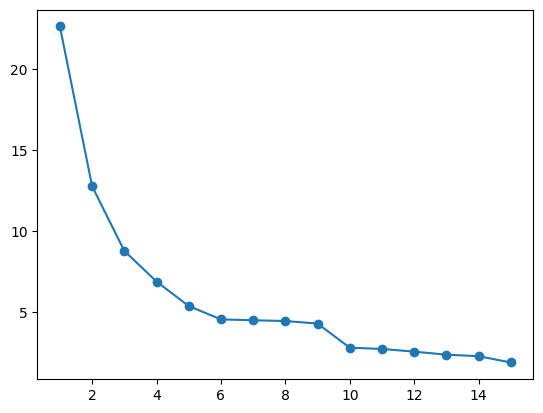

In [13]:
# Analise grafica com as  primeiras linhas
n_cluster_test = 15
# Filtrando a quantidade de grupos pelo número de cluster que vai ser testado
avaliacao_clusters = distancias_grupos[distancias_grupos['qtd_grupos'] <= n_cluster_test][['distancia', 'qtd_grupos']]
# Montagem do grafico
plt.plot(avaliacao_clusters['qtd_grupos'], avaliacao_clusters['distancia'], '-o')
plt.show()

In [15]:
# Calculando as médias obtidas nos clusters hierarquicos e essa média é utilizada como centro de cluster
# Com o cluster treinado o predict vai dizer em cluster a pessoa está inserida
dados_cluster_hierarquico['cluster'] = cluster.fit_predict(dados_cluster_hierarquico)
dados_cluster_hierarquico

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Recency,Frequency,Monetary_Value,cluster
2565,1.385396,-0.139535,-0.209144,0
2602,0.385603,-0.364532,-0.207497,0
2708,1.463640,-0.281880,-0.178606,0
2266,-0.770679,2.119619,0.124726,1
3077,-0.257742,1.504321,1.196366,1
...,...,...,...,...
3506,0.976785,-0.254329,-0.213490,0
3365,-0.396843,-0.208412,-0.152526,2
2215,0.724663,-0.359940,-0.232734,0
1169,-0.744597,-0.369124,-0.074151,2


In [16]:
# centroides
# Os centroides são as medias obtidas pelo RFM
centroides = dados_cluster_hierarquico.groupby('cluster') \
                     .agg(media_recencia = pd.NamedAgg('Recency', 'mean'),
                          media_frequencia = pd.NamedAgg('Frequency', 'mean'),
                          media_valor = pd.NamedAgg('Monetary_Value', 'mean'))
centroides

,media_recencia,media_frequencia,media_valor
cluster,,,
0,1.327466,-0.278879,-0.197289
1,-0.722241,1.872975,0.607411
2,-0.557484,-0.088355,-0.070899


**Não hierarquico**

In [18]:
# Treinamento
# É considerado todas as linhas do banco de dados
# init - importante, é necessário passar os parâmetros dos centroides, bascamente ajudando o algoritmo passando as medias
cluster_kmeans = KMeans(n_clusters = 3, init = centroides.values, n_init=1, max_iter = 1000)
cluster_kmeans.fit(dados_normalizados[cols])
cluster_kmeans.cluster_centers_

array([[ 1.35997543e+00, -2.76506987e-01, -1.86818119e-01],
       [-5.78254791e-01,  8.43453752e+00,  1.15731655e+01],
       [-4.98429840e-01,  5.76120883e-02,  8.03896907e-03]])

In [19]:
# Associando os grupos as pessoas
dados['cluster'] = cluster_kmeans.predict(dados_normalizados[cols])
dados.head()

,CustomerID,Recency,Frequency,Monetary_Value,cluster
0,12346.0,325,1,77183.60,1
1,12747.0,22,103,4196.01,2
2,12748.0,4,4595,33719.73,1
3,12749.0,22,199,4090.88,2
4,12820.0,44,59,942.34,2


**Interpretação dos grupos**

In [20]:
# Contagem dos grupos
dados.groupby('cluster').size().to_frame('n')

,n
cluster,
0,1052
1,15
2,2853


In [22]:
# Centroides dos grupos final
centroides_final = dados.groupby('cluster') \
                  .agg(media_recencia = pd.NamedAgg('Recency', 'mean'),
                       media_frequencia = pd.NamedAgg('Frequency', 'mean'),
                       media_valor = pd.NamedAgg('Monetary_Value', 'mean'))
centroides_final

,media_recencia,media_frequencia,media_valor
cluster,,,
0,261.076046,30.170152,466.638033
1,38.133333,1927.266667,88453.224000
2,47.315107,102.934805,1924.532066


In [23]:
# Difinindo o que é alto e o que baixo dentro dos valores com base na media da media
media_recencia = np.mean(centroides_final['media_recencia'])
media_frequencia = np.mean(centroides_final['media_frequencia'])
media_valor = np.mean(centroides_final['media_valor'])

In [24]:
# Classifcação do que é alto e o que é baixo
centroides_ajustado = centroides_final.copy()
# Se o valor da média for maior ou maior do que o esperado recebe a classificação isso aplicando para cada uma das colunas
centroides_ajustado['media_recencia'] = np.where(centroides_final['media_recencia'] > media_recencia, 'alto', 'baixo')
centroides_ajustado['media_frequencia'] = np.where(centroides_final['media_frequencia'] > media_frequencia, 'alto', 'baixo')
centroides_ajustado['media_valor'] = np.where(centroides_final['media_valor'] > media_valor, 'alto', 'baixo')

In [25]:
# Resultado ajustado
centroides_ajustado

,media_recencia,media_frequencia,media_valor
cluster,,,
0,alto,baixo,baixo
1,baixo,alto,alto
2,baixo,baixo,baixo


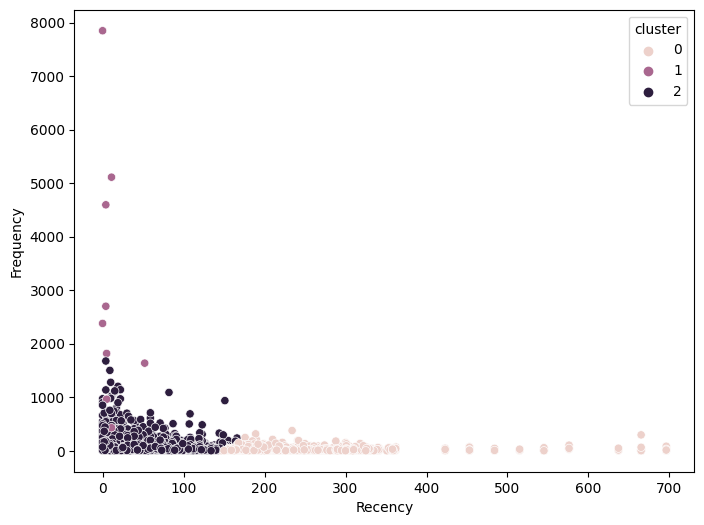

In [30]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
# Podemos aplicar esse gráfico para as outras colunas para análise
sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=dados)
plt.show()